In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [7]:
df=pd.read_csv(r"C:\Users\Stephen\Downloads\PPRALL.csv")

In [8]:
df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [8]:
df.tail()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
548544,12/08/2022,"BALLYBEG, CORRANDULLA, GALWAY",Galway,NaN,110000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548545,12/08/2022,"KILTENNEL, GOREY, COUNTY WEXFORD",Wexford,Y25E4P5,682492.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548546,12/08/2022,"NUMBER 65, CILL BEG MANOR, STRADBALLY",Laois,R32NW66,258000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548547,12/08/2022,"ROSEBORO COTTAGE, ROSEBORO, TIPPERARY",Tipperary,E34K767,145000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
548548,12/08/2022,"SHEANE HOUSE, 1 PARK TERRACE, MOUNTMELLICK",Laois,R32TW24,550000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548549 entries, 0 to 548548
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date of Sale               548549 non-null  object 
 1   Address                    548549 non-null  object 
 2   County                     548549 non-null  object 
 3   Eircode                    54748 non-null   object 
 4   Price                      548549 non-null  float64
 5   Not Full Market Price      548549 non-null  object 
 6   VAT Exclusive              548549 non-null  object 
 7   Description of Property    548549 non-null  object 
 8   Property Size Description  52804 non-null   object 
dtypes: float64(1), object(8)
memory usage: 37.7+ MB


In [9]:
sales_by_county = df.groupby("County")["Price "].sum()
print (sales_by_county)

County
Carlow       9.866856e+08
Cavan        1.085112e+09
Clare        2.112751e+09
Cork         1.421037e+10
Donegal      1.875895e+09
Dublin       7.498545e+10
Galway       5.865227e+09
Kerry        2.711341e+09
Kildare      7.899099e+09
Kilkenny     1.676597e+09
Laois        1.386186e+09
Leitrim      5.333368e+08
Limerick     3.669562e+09
Longford     5.129280e+08
Louth        2.871414e+09
Mayo         1.775781e+09
Meath        5.592341e+09
Monaghan     5.943235e+08
Offaly       1.018498e+09
Roscommon    8.896593e+08
Sligo        1.162445e+09
Tipperary    2.174961e+09
Waterford    2.531829e+09
Westmeath    1.705006e+09
Wexford      3.242268e+09
Wicklow      5.823234e+09
Name: Price , dtype: float64


In [10]:
pd.options.display.float_format = "{:.2f}".format

In [11]:
sales_by_county = df.groupby("County")["Price "].sum()
print (sales_by_county)

County
Carlow        986685649.73
Cavan        1085112190.68
Clare        2112750935.87
Cork        14210369158.95
Donegal      1875895032.72
Dublin      74985452347.95
Galway       5865226908.50
Kerry        2711341368.18
Kildare      7899098737.44
Kilkenny     1676597425.98
Laois        1386185968.11
Leitrim       533336823.16
Limerick     3669561972.50
Longford      512927981.73
Louth        2871413717.87
Mayo         1775780555.32
Meath        5592341053.99
Monaghan      594323484.31
Offaly       1018498292.54
Roscommon     889659303.65
Sligo        1162445099.97
Tipperary    2174961417.54
Waterford    2531829010.29
Westmeath    1705006163.76
Wexford      3242267569.95
Wicklow      5823233595.96
Name: Price , dtype: float64


In [16]:
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

In [31]:
df['year'] = df.apply(lambda x: '2021' if x['Date of Sale'] >= pd.to_datetime('01/01/2021') 
                      else '2022' if x['Date of Sale'] >= pd.to_datetime('01/01/2022') 
                       else '2011' if x['Date of Sale'] >= pd.to_datetime('01/01/2011')
                      else '2010' if x['Date of Sale'] >= pd.to_datetime('01/01/2010')
                        else '2012' if x['Date of Sale'] >= pd.to_datetime('01/01/2012')
                        else '2013' if x['Date of Sale'] >= pd.to_datetime('01/01/2013')
                      else '2014' if x['Date of Sale'] >= pd.to_datetime('01/01/2014')
                      else '2015' if x['Date of Sale'] >= pd.to_datetime('01/01/2015')
                      else '2016' if x['Date of Sale'] >= pd.to_datetime('01/01/2016')
                       else '2017' if x['Date of Sale'] >= pd.to_datetime('01/01/2017')
                      else '2018' if x['Date of Sale'] >= pd.to_datetime('01/01/2018')
                       else '2019' if x['Date of Sale'] >= pd.to_datetime('01/01/2019')
                            else '2020' if x['Date of Sale'] >= pd.to_datetime('01/01/2020')
                      else'N/A', axis=1)

KeyboardInterrupt: 

In [33]:
df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,year
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,N/A
1,2010-03-01,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,N/A
2,2010-04-01,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,N/A
3,2010-04-01,"1 The Haven, Mornington",Meath,NaN,400000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,N/A
4,2010-04-01,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,N/A


In [34]:
df.tail()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,year
548544,2022-12-08,"BALLYBEG, CORRANDULLA, GALWAY",Galway,NaN,110000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2021
548545,2022-12-08,"KILTENNEL, GOREY, COUNTY WEXFORD",Wexford,Y25E4P5,682492.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2021
548546,2022-12-08,"NUMBER 65, CILL BEG MANOR, STRADBALLY",Laois,R32NW66,258000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2021
548547,2022-12-08,"ROSEBORO COTTAGE, ROSEBORO, TIPPERARY",Tipperary,E34K767,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2021
548548,2022-12-08,"SHEANE HOUSE, 1 PARK TERRACE, MOUNTMELLICK",Laois,R32TW24,550000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2021


In [17]:
df1=pd.read_csv(r"C:\Users\Stephen\Downloads\PPRALLYEAR.csv")

In [20]:
df1.head()


,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2010


In [21]:
df1.tail()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
548544,12/08/2022,"BALLYBEG, CORRANDULLA, GALWAY",Galway,NaN,110000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548545,12/08/2022,"KILTENNEL, GOREY, COUNTY WEXFORD",Wexford,Y25E4P5,682492.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548546,12/08/2022,"NUMBER 65, CILL BEG MANOR, STRADBALLY",Laois,R32NW66,258000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548547,12/08/2022,"ROSEBORO COTTAGE, ROSEBORO, TIPPERARY",Tipperary,E34K767,145000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2022
548548,12/08/2022,"SHEANE HOUSE, 1 PARK TERRACE, MOUNTMELLICK",Laois,R32TW24,550000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2022


In [40]:
Sales_By_year = df.groupby("Year")["Price "].count()
Sales_By_year =  Sales_By_year.sort_index()

KeyError: 'Year '

Text(0.5, 1.0, 'Sales 2010 - 2022')

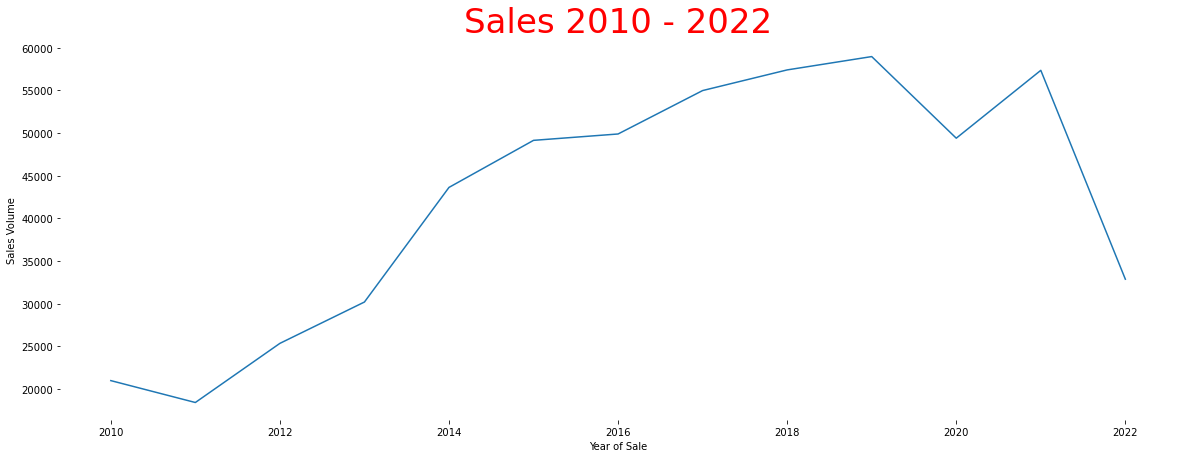

In [51]:
plt.figure(figsize=(20,7))
sns.lineplot(x=Sales_By_year.index, y=Sales_By_year.values)
plt.box(on=None)
plt.ylabel('Sales Volume')
plt.xlabel('Year of Sale')
plt.title("Sales 2010 - 2022", fontsize=34, color='red')

In [24]:
ND=pd.read_csv(r"C:\Users\Stephen\Downloads\Ireland New Dwelling completions 2011-2019.csv")

In [25]:
ND.head()

,Year,Single,Scheme,Apartment
0,2011,"4,814",1358,822
1,2012,"3,501",964,446
2,2013,"2,947",1155,473
3,2014,"2,975",1795,748
4,2015,"3,294",3294,673


In [26]:
NewBuilds_df = pd.merge(df1,ND, how='inner', on ='Year')
NewBuilds_df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Single,Scheme,Apartment
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin,NaN,108532.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822
1,04/01/2011,"1 Lenaboy Gardens, Salthill",Galway,NaN,300000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822
2,04/01/2011,"1 The Standing Stone, Clongeen",Wexford,NaN,143000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822
3,04/01/2011,"15 Frenchville, Grattan Road, Galway",Galway,NaN,330000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822
4,04/01/2011,"20 Victoria Court, West End, Kilkee",Clare,NaN,175000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822


In [ ]:
tips.groupby(['sex','smoker','time'])['tip'].agg(['mean','median','std'])

In [67]:
Summary_by_year_df = NewBuilds_df.groupby([ "Year" , "Single ", "Scheme", "Apartment"])['County'].agg('count').reset_index(name="Total House Sales")
print (Summary_by_year_df)

   Year Single   Scheme  Apartment  Total House Sales
0  2011   4,814    1358        822              18428
1  2012   3,501     964        446              25356
2  2013   2,947    1155        473              30200
3  2014   2,975    1795        748              43626
4  2015   3,294    3294        673              49139
5  2016   3,657    5068       1161              49885
6  2017   4,250    7886       2217              54972
7  2018   4,682   10982       2820              57391
8  2019   5,067   12516       3550              58953


Text(0.5, 1.0, 'Summary By Year')

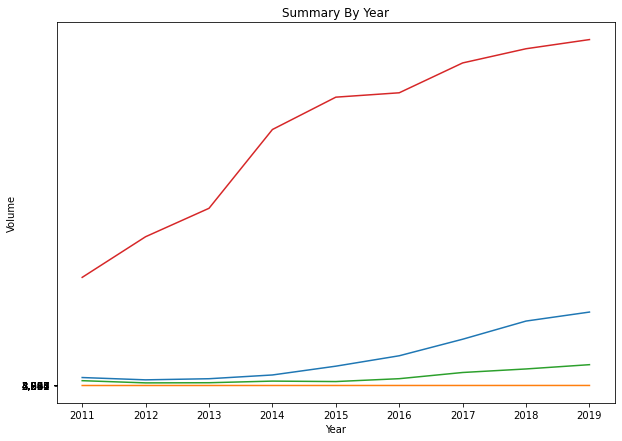

In [56]:
plt.subplots(figsize=(10,7))

plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Scheme'])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Single '])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Apartment'])
plt.plot(Summary_by_year_df['Year'],Summary_by_year_df['Total Sales'])


plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Summary By Year')

In [46]:
NewBuilds_df['Total Sales'] = NewBuilds_df.groupby([ "Year"])['Scheme'].agg('count')

In [48]:
NewBuilds_df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Single,Scheme,Apartment,Total Sales
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin,NaN,108532.00,Yes,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822,NaN
1,04/01/2011,"1 Lenaboy Gardens, Salthill",Galway,NaN,300000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822,NaN
2,04/01/2011,"1 The Standing Stone, Clongeen",Wexford,NaN,143000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822,NaN
3,04/01/2011,"15 Frenchville, Grattan Road, Galway",Galway,NaN,330000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822,NaN
4,04/01/2011,"20 Victoria Court, West End, Kilkee",Clare,NaN,175000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2011,"4,814",1358,822,NaN


In [ ]:
NewBuilds_df['Total Sales'] = NewBuilds_df.groupby([ "Year"])['Scheme'].agg('count')

In [44]:
sales_by_county = df.groupby("County")["Price "].sum()
print (sales_by_county)

County
Carlow        986685649.73
Cavan        1085112190.68
Clare        2112750935.87
Cork        14210369158.95
Donegal      1875895032.72
Dublin      74985452347.95
Galway       5865226908.50
Kerry        2711341368.18
Kildare      7899098737.44
Kilkenny     1676597425.98
Laois        1386185968.11
Leitrim       533336823.16
Limerick     3669561972.50
Longford      512927981.73
Louth        2871413717.87
Mayo         1775780555.32
Meath        5592341053.99
Monaghan      594323484.31
Offaly       1018498292.54
Roscommon     889659303.65
Sligo        1162445099.97
Tipperary    2174961417.54
Waterford    2531829010.29
Westmeath    1705006163.76
Wexford      3242267569.95
Wicklow      5823233595.96
Name: Price , dtype: float64


In [58]:
Summary_by_year_df.head()

,Year,Single,Scheme,Apartment,Total House Sales
0,2011,"4,814",1358,822,18428
1,2012,"3,501",964,446,25356
2,2013,"2,947",1155,473,30200
3,2014,"2,975",1795,748,43626
4,2015,"3,294",3294,673,49139


In [86]:
d = {'Teach/�ras�n C�naithe Nua':'New Dwelling house /Apartment', 'Teach/�ras�n C�naithe Ath�imhe' :'Second-Hand Dwelling house /Apartment', 'Teach/?ras?n C?naithe Nua' : 'New Dwelling house /Apartment'}

In [77]:
avg_Price_By_County = NewBuilds_df.groupby("County",)["Price "].mean()
print(avg_Price_By_County)

County
Carlow      142572.83
Cavan       110959.62
Clare       152908.78
Cork        220957.28
Donegal     110946.90
Dublin      398591.09
Galway      196485.08
Kerry       152420.86
Kildare     258151.79
Kilkenny    173944.43
Laois       139625.14
Leitrim      96056.20
Limerick    160347.46
Longford     89243.60
Louth       176913.60
Mayo        122416.81
Meath       231724.94
Monaghan    124652.60
Offaly      131515.13
Roscommon    98597.16
Sligo       129819.10
Tipperary   133479.01
Waterford   150072.58
Westmeath   144286.37
Wexford     149807.47
Wicklow     302129.54
Name: Price , dtype: float64


In [88]:
df1 = df1.replace(d)

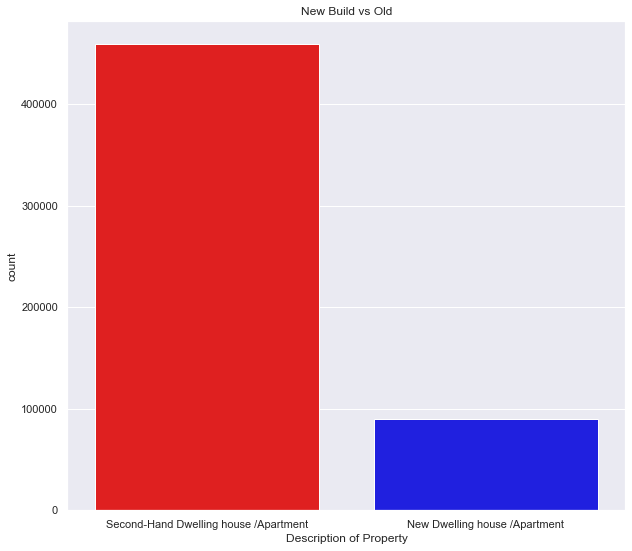

In [94]:
plt.figure(figsize=(10,9))
sns.set(style="darkgrid")
plt.title("New Build vs Old")
ax = sns.countplot(x="Description of Property", data=df1, palette=('Red','Blue','Green'))

In [89]:
Sales_by_type = df1.groupby("Description of Property",)["Price "].count()
print(Sales_by_type)

Description of Property
New Dwelling house /Apartment             89536
Second-Hand Dwelling house /Apartment    459013
Name: Price , dtype: int64
